In [1]:
from scope_gen.molecules.paths import CKPT_DIR
from scope_gen.molecules.utils import load_model_from_ckpt_path
from scope_gen.molecules.data.datasets import MosesDataset
from rdkit import Chem
import torch
import numpy as np

In [2]:
# use GPU is cuda is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = load_model_from_ckpt_path(CKPT_DIR + '/checkpoint_moses.ckpt', map_location=device)

Found rdkit, all good
Marginal distribution of the classes: tensor([0.5664, 0.1071, 0.1283, 0.0812, 0.1115, 0.0042, 0.0012, 0.0000],
       device='cuda:0') for nodes, tensor([8.4956e-01, 4.4773e-02, 5.9329e-02, 3.3361e-04, 4.6009e-02],
       device='cuda:0') for edges


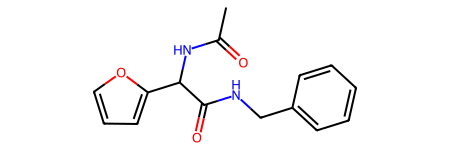

In [3]:
# load moses test set
dataset = MosesDataset(repr='mol')
idx = 11
example = dataset[idx]
example
# convert to SMILES string
#smiles_example = Chem.MolToSmiles(example)
#smiles_example

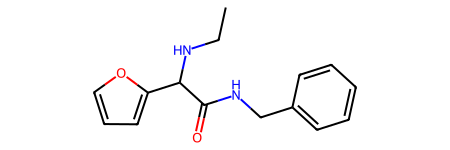

In [4]:
from scope_gen.molecules.data.fragment_gen import remove_atom
from rdkit.Chem import QED
from scope_gen.utils import set_seed
set_seed(4)
scaffold = remove_atom(example)[0]
scaffold
#smiles_scaffold = Chem.MolToSmiles(scaffold)
#smiles_scaffold

In [5]:
from rdkit.Chem.Draw import rdMolDraw2D
from scope_gen.molecules.paths import DATA_DIR
import os
d = rdMolDraw2D.MolDraw2DSVG(500, 500)
    
# Draw molecule with highlighted non-substructure
rdMolDraw2D.PrepareAndDrawMolecule(d, scaffold)

# Finish drawing
d.FinishDrawing()

# Get SVG string
svg = d.GetDrawingText()
# save svg to file
with open(os.path.join(DATA_DIR, 'scaffold.svg'), 'w') as f:
    f.write(svg)

from scope_gen.molecules.visualizations.visualization import highlight_removed_atom

# generate visualization of full molecule with scaffold highlighted
vis = highlight_removed_atom(example, scaffold)
with open(os.path.join(DATA_DIR, 'gt.svg'), 'w') as f:
    f.write(vis)